In [1]:
#Loading Packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")
import itertools

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [86]:
data = pd.read_csv('./data/covtype.csv',sep=',', encoding='utf8')

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
data.shape

(581012, 55)

In [5]:
data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [ ]:
data.info()

In [ ]:
data.isna().sum()

In [7]:
data['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [8]:
data['Cover_Type'].value_counts(normalize=True)

2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: Cover_Type, dtype: float64

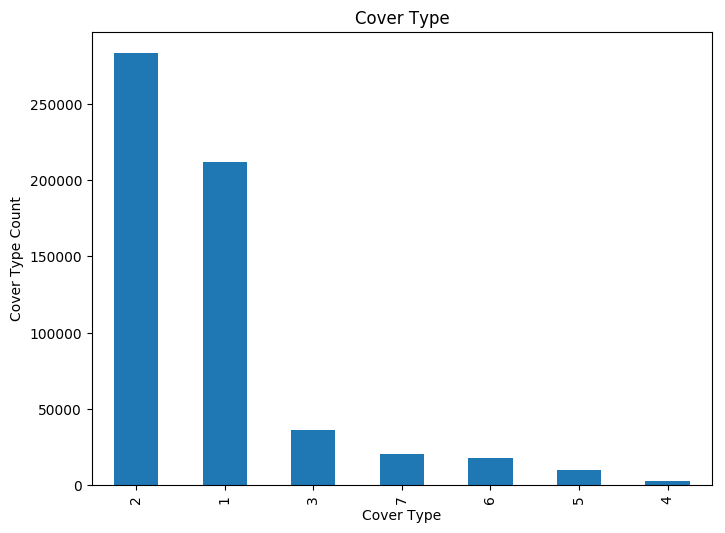

In [96]:
plt.title('Cover Type Bar Plot')
plt.xlabel('Cover Type')
plt.ylabel('Cover Type Count')

data['Cover_Type'].value_counts().plot.bar(figsize=(8,6),title='Cover Type')

In [23]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [128]:
data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [69]:
x = data.drop('Cover_Type', axis=1)
y = data["Cover_Type"]

continuous_data = x.iloc[:, :10]
continuous_features = list(continuous_data.columns)

ordinal_data = x.iloc[:,10 :54]
ordinal_features = list(ordinal_data.columns)

In [ ]:
for index, i in enumerate(ordinal_features):
  plt.figure(index)
  data[i].value_counts(normalize=True).plot.bar(figsize=(8,6), title=i)

plt.show()

In [97]:
!pip install -U scikit-learn

  Using cached https://files.pythonhosted.org/packages/30/aa/db462d385c56905b731403885454188683f63c86ea68900f6f7e7558b5fa/scikit_learn-0.24.0-cp36-cp36m-manylinux2010_x86_64.whl
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.5 which is incompatible.
ERROR: feature-selector 1.0.0 has requirement scikit-learn==0.19.1, but you'll have scikit-learn 0.24.0 which is incompatible.
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


In [98]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method = 'yeo-johnson')
scaled_df = scaler.fit_transform(continuous_data)
df_scaled = pd.DataFrame(scaled_df, columns=continuous_features)

In [99]:
features = continuous_features + ordinal_features
x = pd.concat([df_scaled, ordinal_data], axis=1) #pd.DataFrame(np.column_stack([df_scaled,x.iloc[:, 10:54]]), columns=features)
x.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-1.301885,-0.875862,-1.892859,0.188898,-0.767026,-1.434002,0.209330,0.356983,0.112478,2.300448,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-1.317747,-0.804208,-2.207409,-0.030821,-0.966776,-1.634289,0.161846,0.551429,0.193087,2.282208,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-0.685826,0.081256,-0.605934,0.233680,0.398798,0.673140,0.885431,0.754744,-0.232387,2.246761,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.747674,0.214532,0.628511,0.115173,1.192451,0.627067,1.116561,0.754744,-0.569637,2.277460,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-1.304535,-0.966982,-2.207409,-0.356327,-0.796439,-1.632476,0.161846,0.485642,0.166176,2.264196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#from sklearn.preprocessing import QuantileTransformer

#qt = QuantileTransformer(output_distribution='normal')

In [30]:
#x = data.drop('Cover_Type', axis=1)
#data_label = data["Cover_Type"]

#x['Elevation'] = qt.fit_transform(x[['Elevation']].values.reshape(-1,1))
#x['Aspect'] = qt.fit_transform(x[['Aspect']].values.reshape(-1,1))
#x['Slope'] = qt.fit_transform(x[['Slope']].values.reshape(-1,1))
#x['Horizontal_Distance_To_Hydrology'] = qt.fit_transform(x[['Horizontal_Distance_To_Hydrology']].values.reshape(-1,1))
#x['Vertical_Distance_To_Hydrology'] = qt.fit_transform(x[['Vertical_Distance_To_Hydrology']].values.reshape(-1,1))
#x['Horizontal_Distance_To_Roadways'] = qt.fit_transform(x[['Horizontal_Distance_To_Roadways']].values.reshape(-1,1))
#x['Hillshade_9am'] = qt.fit_transform(x[['Hillshade_9am']].values.reshape(-1,1))
#x['Hillshade_Noon'] = qt.fit_transform(x[['Hillshade_Noon']].values.reshape(-1,1))
#x['Hillshade_3pm'] = qt.fit_transform(x[['Hillshade_3pm']].values.reshape(-1,1))
#x['Horizontal_Distance_To_Fire_Points'] = qt.fit_transform(x[['Horizontal_Distance_To_Fire_Points']].values.reshape(-1,1))

In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [100]:
print(continuous_features)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


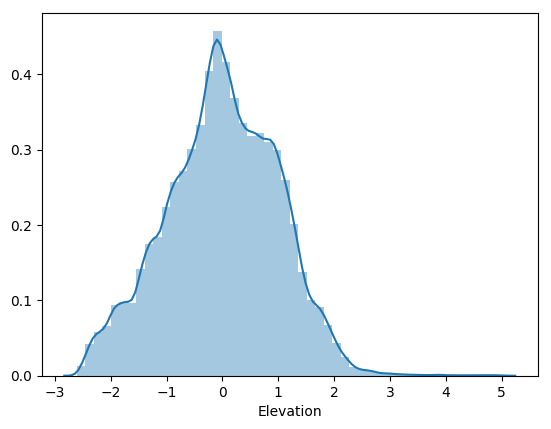

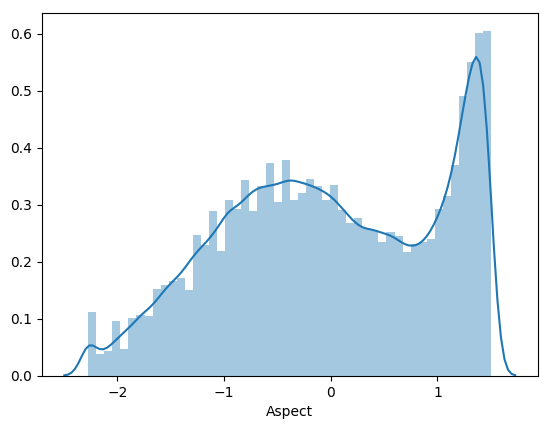

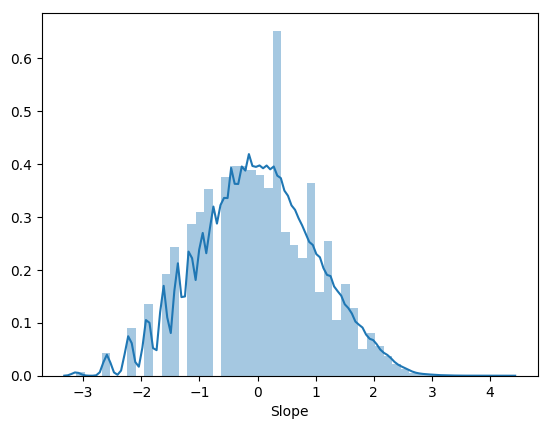

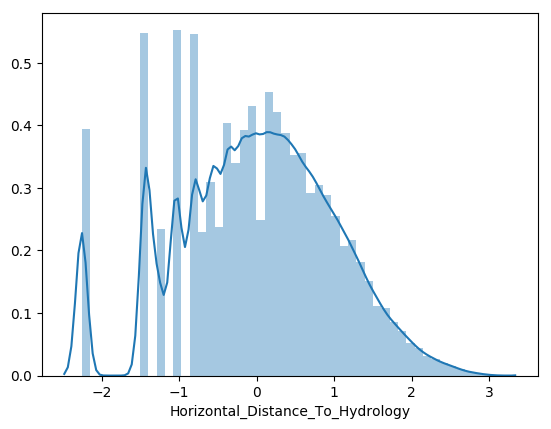

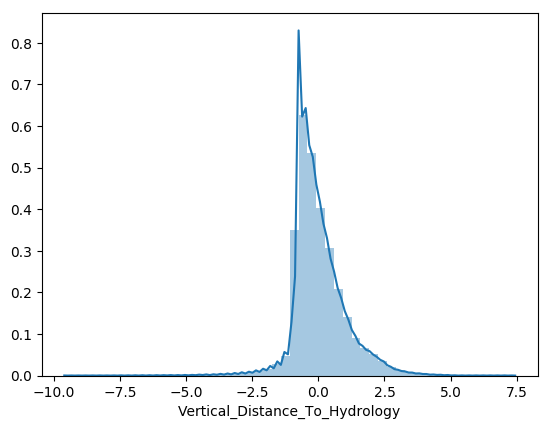

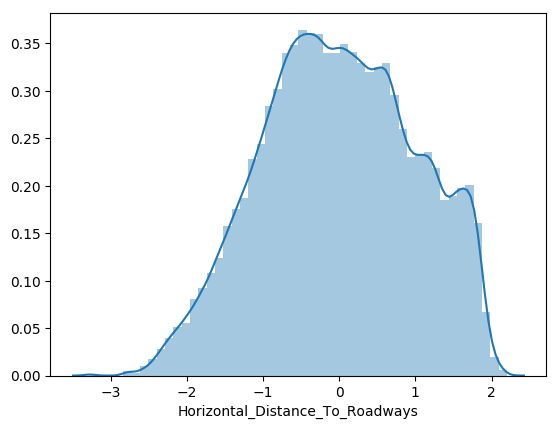

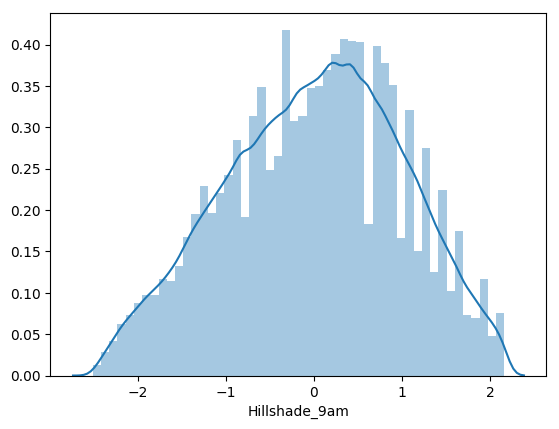

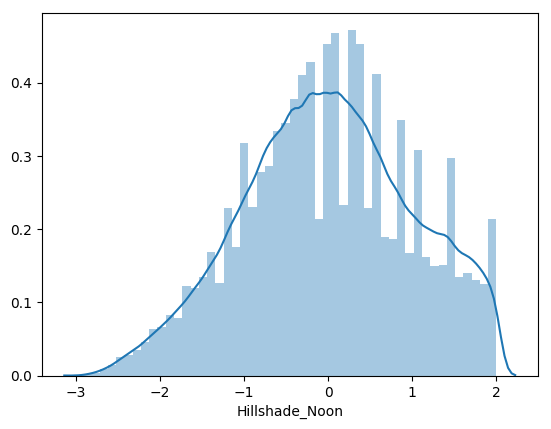

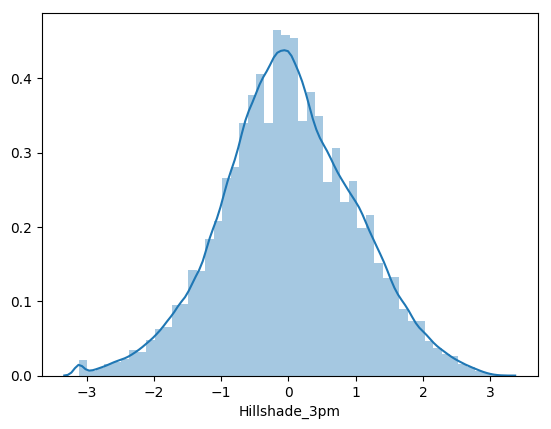

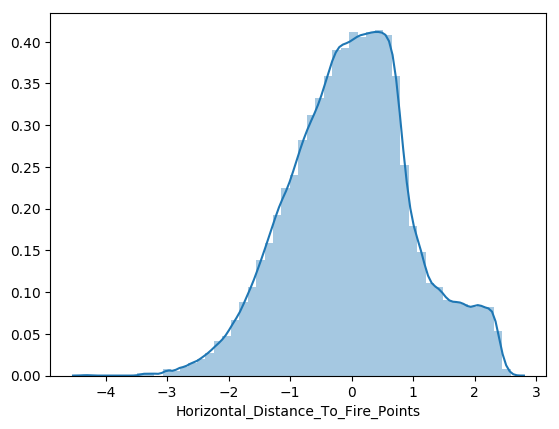

In [101]:
for index, i in enumerate(continuous_features):
  if(x[i].dtype == np.float64 or x[i].dtype == np.int64):
    plt.figure(index)
    sns.distplot(x[i])
plt.show()

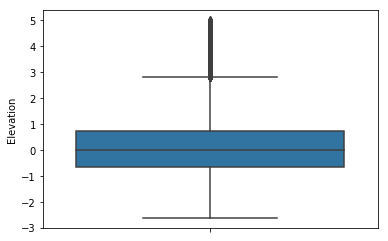

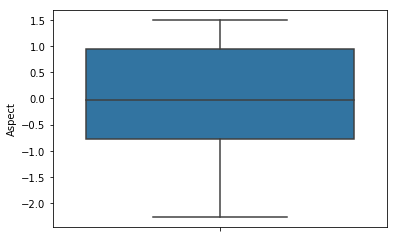

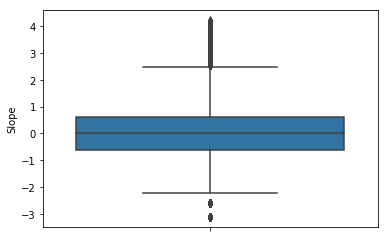

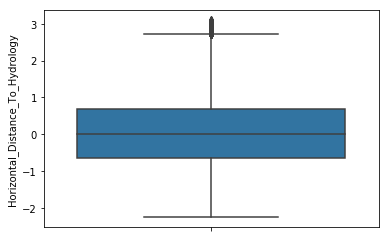

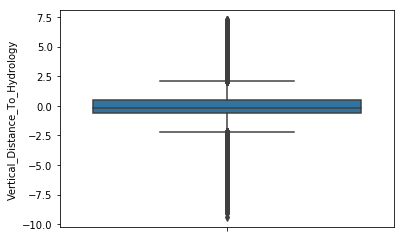

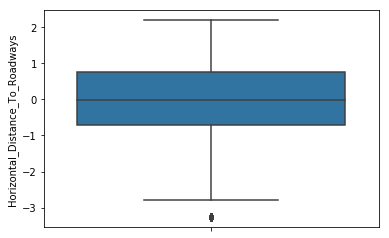

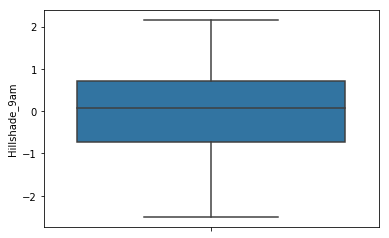

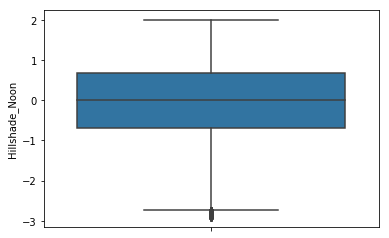

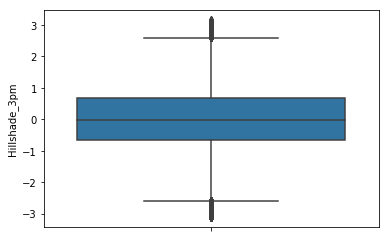

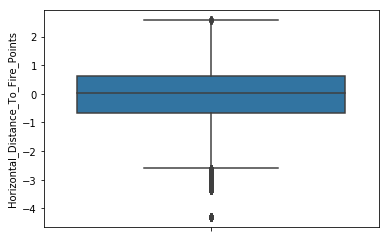

In [56]:
for index, i in enumerate(continuous_features):
  if((x[i].dtype == np.float64) or (x[i].dtype == np.int64)):
    plt.figure(index)
    sns.boxplot(y=x[i])
plt.show()

In [34]:
#for variable in continuous_features:
#    #calculate the IQR
#    #IQR = x[variable].quantile(0.75) - x[variable].quantile(0.25)
#    
#    #calculate the boundries
#    #lower = x[variable].quantile(0.25) - (IQR * 1.5)
#    #upper = x[variable].quantile(0.75) + (IQR * 1.5)
#    
#    # find the outliers
#    #outliers = np.where(x[variable] > upper, True, np.where(x[variable] < lower, True, False))#
#
#    #calculate the boundries
#    lower = x[variable].mean() - 3 * x[variable].std()
#    upper = x[variable].mean() + 3 * x[variable].std()
#    
#    # replacing the outliers
#    x[variable] = np.where(x[variable] > upper, upper, np.where(x[variable] < lower, lower, x[variable]))

    
    # remove outliers from data.
    #x = x.loc[~outliers, ]  

In [49]:
for_export = pd.concat([x, y], axis=1) 
for_export.to_csv('./data/data_scaled_yeo-johnson.csv',sep=',', encoding='utf8')

In [36]:
from_export = pd.read_csv('./data/data_scaled_yeo-johnson.csv',sep=',', encoding='utf8')
from_export.drop(from_export.columns[from_export.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
x = from_export.drop('Cover_Type', axis=1)
y = from_export["Cover_Type"]

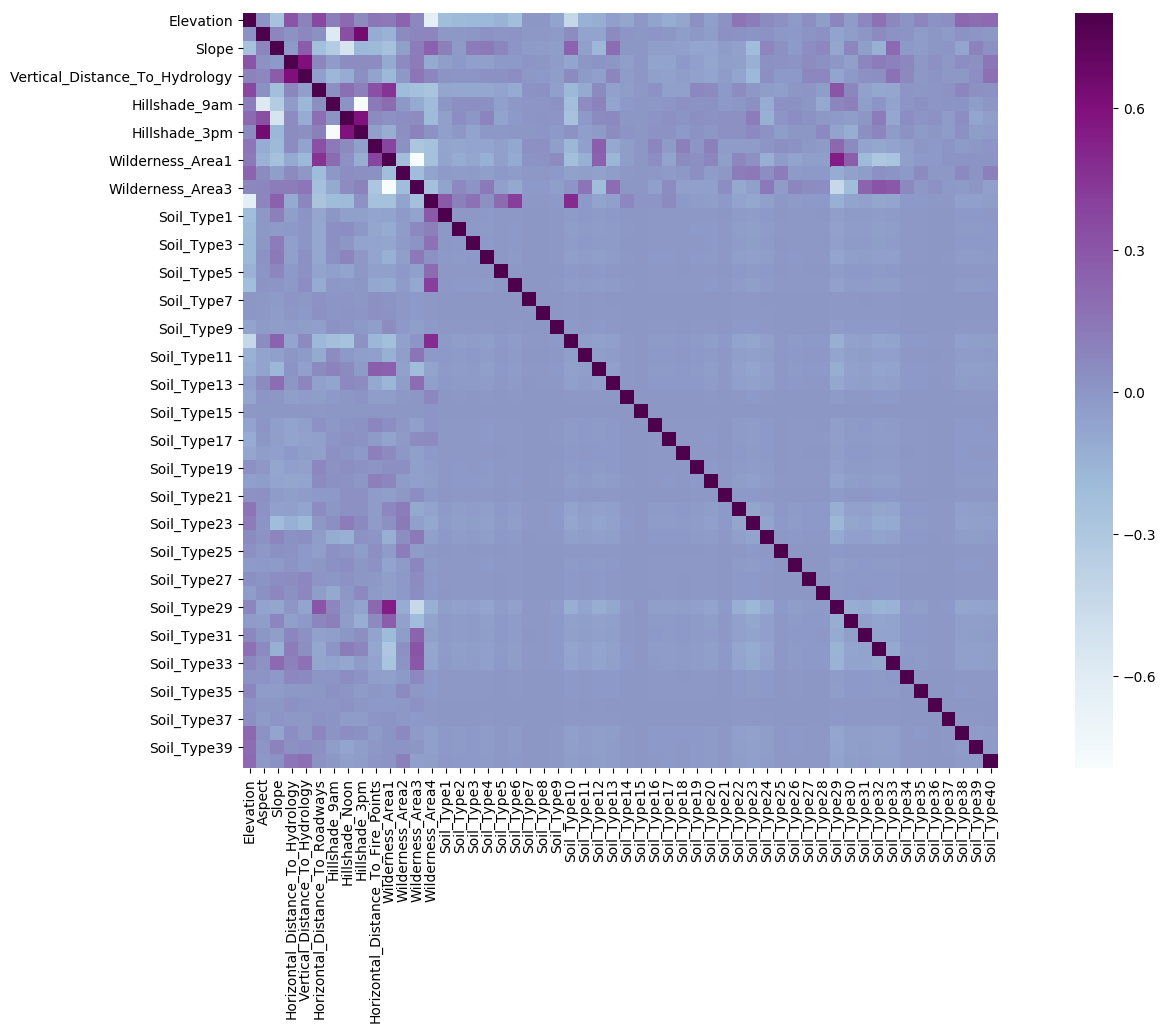

In [78]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(x.corr(), vmax=.8, square=True, cmap="BuPu")

In [38]:
!pip install feature_selector

  Using cached https://files.pythonhosted.org/packages/68/1e/116ad560de97694e2d0c1843a7a0075cc9f49e922454d32f49a80eb6f1f2/numpy-1.14.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/57/eb/6ab533ea8e35e7dd159af6922ac1123d4565d89f3926ad9a6aa46530978f/pandas-0.23.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3d/2d/9fbc7baa5f44bc9e88ffb7ed32721b879bfa416573e85031e16f52569bc9/scikit_learn-0.19.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.23.1 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.5 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement scikit-learn>=0.2

In [60]:
x.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-1.301885,-0.875862,-1.892859,0.188898,-0.767026,-1.434002,0.209330,0.356983,0.112478,2.300448,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-1.317747,-0.804208,-2.207409,-0.030821,-0.966776,-1.634289,0.161846,0.551429,0.193087,2.282208,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-0.685826,0.081256,-0.605934,0.233680,0.398798,0.673140,0.885431,0.754744,-0.232387,2.246761,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.747674,0.214532,0.628511,0.115173,1.192451,0.627067,1.116561,0.754744,-0.569637,2.277460,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-1.304535,-0.966982,-2.207409,-0.356327,-0.796439,-1.632476,0.161846,0.485642,0.166176,2.264196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [102]:
from feature_selector import FeatureSelector
x = data.drop('Cover_Type', axis=1)
y = data["Cover_Type"]
fs = FeatureSelector(data = x, labels = y)

In [103]:
fs.identify_missing(missing_threshold=0.5)

0 features with greater than 0.50 missing values.



In [104]:
fs.identify_single_unique()

0 features with a single unique value.



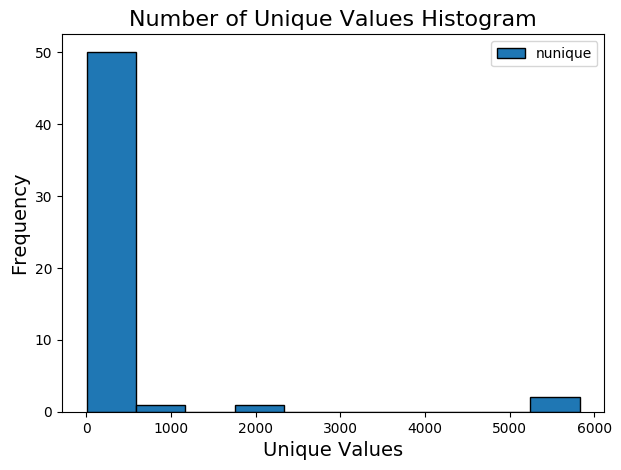

In [105]:
fs.plot_unique()

In [106]:
fs.identify_collinear(correlation_threshold=0.50)

7 features with a correlation magnitude greater than 0.50.



In [107]:
correlated_features = fs.ops['collinear']
correlated_features[:7]

['Vertical_Distance_To_Hydrology',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type29']

In [ ]:
fs.plot_collinear()

In [ ]:
fs.plot_collinear(plot_all=True)

In [46]:
fs.record_collinear.head(30)

,drop_feature,corr_feature,corr_value
0,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Hydrology,0.515477
1,Hillshade_3pm,Aspect,0.585207
2,Hillshade_3pm,Hillshade_9am,-0.823550
3,Hillshade_3pm,Hillshade_Noon,0.584033
4,Wilderness_Area3,Wilderness_Area1,-0.793593
5,Wilderness_Area4,Elevation,-0.509942
6,Soil_Type29,Wilderness_Area1,0.550549


In [47]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.152968
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.150246
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.152403
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.152978
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.152077
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.153091
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.149984
Training until validation scores don't improve for 100 rounds.
Early stopping, best 

In [50]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 54 original features
There are 0 one-hot features


In [51]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[0:40]

['Soil_Type8',
 'Soil_Type37',
 'Soil_Type36',
 'Soil_Type34',
 'Soil_Type7',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type15',
 'Soil_Type28',
 'Soil_Type27',
 'Soil_Type26',
 'Soil_Type25',
 'Soil_Type24',
 'Soil_Type18',
 'Soil_Type21',
 'Soil_Type9']

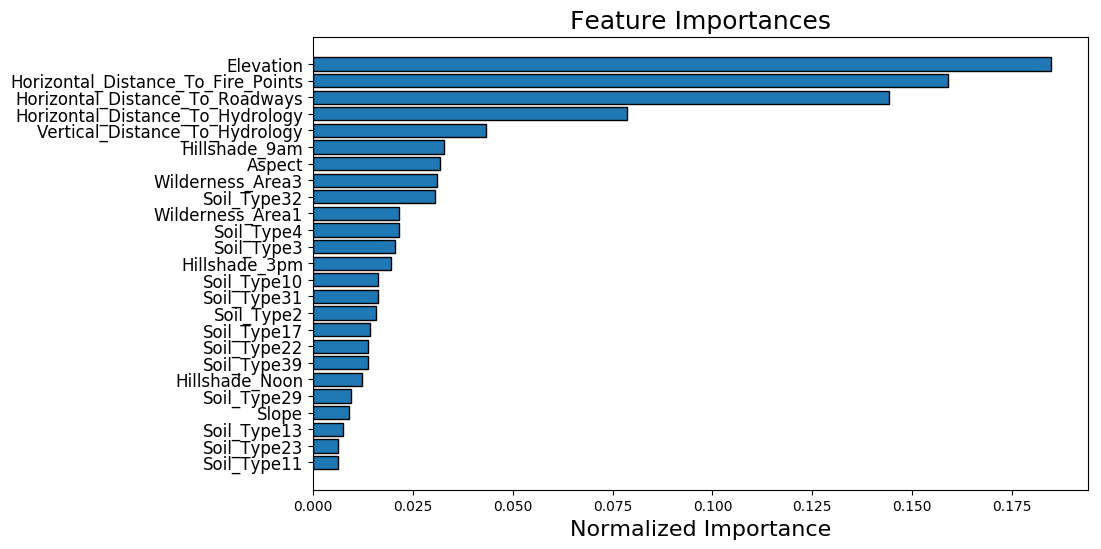

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


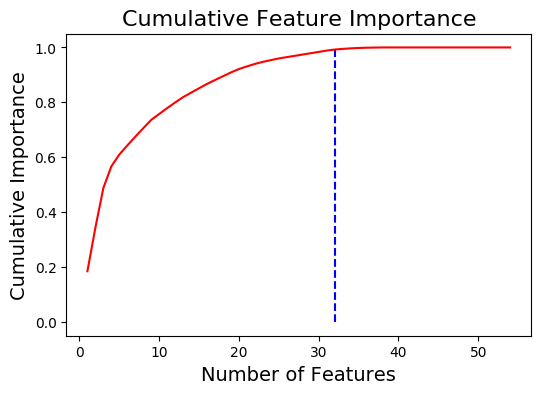

32 features required for 0.99 of cumulative importance


In [52]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 25)

In [18]:
fs.feature_importances.head(31)

,feature,importance,normalized_importance,cumulative_importance
0,Elevation,38.6,0.183810,0.183810
1,Horizontal_Distance_To_Fire_Points,32.9,0.156667,0.340476
2,Horizontal_Distance_To_Roadways,29.8,0.141905,0.482381
3,Horizontal_Distance_To_Hydrology,17.3,0.082381,0.564762
4,Vertical_Distance_To_Hydrology,9.7,0.046190,0.610952
5,Aspect,7.1,0.033810,0.644762
6,Hillshade_9am,7.1,0.033810,0.678571
7,Soil_Type32,6.5,0.030952,0.709524
8,Wilderness_Area3,6.3,0.030000,0.739524
9,Wilderness_Area1,5.0,0.023810,0.763333


In [53]:
ten_features = list(fs.feature_importances.loc[:9, 'feature'])
len(ten_features)

10

In [54]:
fs.identify_low_importance(cumulative_importance = 0.99)

31 features required for cumulative importance of 0.99 after one hot encoding.
23 features do not contribute to cumulative importance of 0.99.



In [55]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:35]

['Soil_Type40',
 'Soil_Type14',
 'Soil_Type1',
 'Soil_Type33',
 'Wilderness_Area4',
 'Soil_Type16',
 'Soil_Type18',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type15',
 'Soil_Type36',
 'Soil_Type19',
 'Soil_Type7',
 'Soil_Type34',
 'Soil_Type21',
 'Soil_Type37',
 'Soil_Type8',
 'Soil_Type5',
 'Soil_Type20',
 'Soil_Type9']

In [56]:
train_no_missing = fs.remove(methods = ['missing'])
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])
all_to_remove = fs.check_removal()
all_to_remove[10:25]

Removed 0 features.
Removed 16 features.
Total of 27 features identified for removal


['Soil_Type14',
 'Soil_Type9',
 'Wilderness_Area4',
 'Soil_Type7',
 'Soil_Type15',
 'Soil_Type36',
 'Soil_Type24',
 'Vertical_Distance_To_Hydrology',
 'Soil_Type33',
 'Soil_Type5',
 'Soil_Type21',
 'Soil_Type28',
 'Soil_Type37',
 'Soil_Type27',
 'Soil_Type26']

In [57]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 27 features.


In [25]:
for_export = pd.concat([train_removed, y], axis=1) 
for_export.to_csv('./data/data_scaled_yeo-johnson.csv',sep=',', encoding='utf8')

In [26]:
import pandas as pd

data = pd.read_csv('./data/data_scaled_yeo-johnson.csv',sep=',', encoding='utf8')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
x = data.drop('Cover_Type', axis=1)
features = list(x.columns)
y = data["Cover_Type"]

In [26]:
!pip install imblearn

     |████████████████████████████████| 6.8MB 4.6MB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.5 which is incompatible.
ERROR: feature-selector 1.0.0 has requirement scikit-learn==0.19.1, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


In [27]:
x.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type17,Soil_Type22,Soil_Type23,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type35,Soil_Type38,Soil_Type39
0,-1.301885,-0.875862,-1.892859,0.188898,-1.434002,0.209330,0.356983,2.300448,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.317747,-0.804208,-2.207409,-0.030821,-1.634289,0.161846,0.551429,2.282208,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.685826,0.081256,-0.605934,0.233680,0.673140,0.885431,0.754744,2.246761,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.747674,0.214532,0.628511,0.115173,0.627067,1.116561,0.754744,2.277460,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-1.304535,-0.966982,-2.207409,-0.356327,-1.632476,0.161846,0.485642,2.264196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

x_resampled, y_resampled = rus.fit_sample(x, y)
y_resampled = y_resampled.squeeze()

In [32]:
label = pd.DataFrame(y_resampled, columns=["Cover_Type"])
x = pd.DataFrame(x_resampled, columns=features)
label["Cover_Type"] = label["Cover_Type"].map({1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:0})
label["Cover_Type"].value_counts()

6    2747
5    2747
4    2747
3    2747
2    2747
1    2747
0    2747
Name: Cover_Type, dtype: int64

In [34]:
for_export = pd.concat([x, label], axis=1) 
for_export.drop(for_export.columns[for_export.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
for_export.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type17,Soil_Type22,Soil_Type23,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type35,Soil_Type38,Soil_Type39,Cover_Type
0,0.297449,-1.925016,0.265764,-0.655996,0.920789,-0.664706,-0.823777,0.220807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.669856,-1.189663,-0.442391,1.546148,-0.202988,0.068732,-0.441248,0.630985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,-0.066792,1.427360,-1.382032,-0.570156,-0.209617,-0.320755,0.294090,1.153306,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.993420,-0.222662,-0.605934,-0.134700,0.455199,0.942155,0.171126,-0.861256,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.864485,-1.974870,0.265764,1.082252,0.154196,-0.664706,-0.778659,1.116263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [35]:
for_export.to_csv('/content/drive/My Drive/Colab Notebooks/data/forest/data_scaled_yeo-johnson.csv',sep=',', encoding='utf8')